# Normal Prediction:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Loading Dataset,
file_path = 'heart_AI.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,State,Sex,GeneralHealth,CovidPos,HighRiskLastYear,PneumoVaxEver,PhysicalActivities,SleepHours,AlcoholDrinkers,HadHeartAttack,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,HIVTesting,AgeCategory,HeightInMeters,WeightInKilograms,BMI
0,Alabama,Female,Very good,No,No,Yes,Yes,9.0,No,No,...,No,No,Former,Never,No,No,Age 65 to 69,1.60,71.67,27.99
1,Alabama,Male,Very good,No,No,Yes,Yes,6.0,No,No,...,No,No,Former,Never,No,No,Age 70 to 74,1.78,95.25,30.13
2,Alabama,Male,Very good,Yes,No,Yes,No,8.0,Yes,No,...,No,No,Former,Never,Yes,No,Age 75 to 79,1.85,108.86,31.66
3,Alabama,Female,Fair,Yes,No,Yes,Yes,9.0,No,No,...,No,No,Never,Never,No,No,Age 80 or older,1.70,90.72,31.32
4,Alabama,Female,Good,No,No,Yes,Yes,5.0,No,No,...,No,No,Never,Never,No,No,Age 80 or older,1.55,79.38,33.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36492,Florida,Female,Excellent,Yes,No,No,Yes,6.0,No,No,...,No,No,Never,Never,No,No,Age 30 to 34,1.73,70.31,23.57
36493,Florida,Male,Very good,Yes,No,No,Yes,9.0,Yes,No,...,No,No,Never,Never,Yes,No,Age 75 to 79,1.60,65.77,25.69
36494,Florida,Female,Good,No,No,No,Yes,7.0,No,No,...,No,No,Never,Former,No,Yes,Age 60 to 64,1.65,72.57,26.63
36495,Florida,Female,Excellent,No,No,No,Yes,8.0,Yes,No,...,No,No,Never,Never,No,No,Age 65 to 69,1.68,62.60,22.27


In [ ]:
# Fill missing values
# Numeric columns: fill with median
numeric_cols = data.select_dtypes(include=['float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Categorical columns: fill with mode
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
data

,State,Sex,GeneralHealth,CovidPos,HighRiskLastYear,PneumoVaxEver,PhysicalActivities,SleepHours,AlcoholDrinkers,HadHeartAttack,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,HIVTesting,AgeCategory,HeightInMeters,WeightInKilograms,BMI
0,0,0,4,0,0,1,1,9.0,0,0,...,0,0,1,2,0,0,9,1.60,71.67,27.99
1,0,1,4,0,0,1,1,6.0,0,0,...,0,0,1,2,0,0,10,1.78,95.25,30.13
2,0,1,4,1,0,1,0,8.0,1,0,...,0,0,1,2,1,0,11,1.85,108.86,31.66
3,0,0,1,1,0,1,1,9.0,0,0,...,0,0,2,2,0,0,12,1.70,90.72,31.32
4,0,0,2,0,0,1,1,5.0,0,0,...,0,0,2,2,0,0,12,1.55,79.38,33.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36492,9,0,0,1,0,0,1,6.0,0,0,...,0,0,2,2,0,0,2,1.73,70.31,23.57
36493,9,1,4,1,0,0,1,9.0,1,0,...,0,0,2,2,1,0,11,1.60,65.77,25.69
36494,9,0,2,0,0,0,1,7.0,0,0,...,0,0,2,1,0,1,8,1.65,72.57,26.63
36495,9,0,0,0,0,0,1,8.0,1,0,...,0,0,2,2,0,0,9,1.68,62.60,22.27


In [ ]:
# target variable
target = 'HadHeartAttack'

# Split data into features (X) and target (y)
X = data.drop(target, axis=1)
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,State,Sex,GeneralHealth,CovidPos,HighRiskLastYear,PneumoVaxEver,PhysicalActivities,SleepHours,AlcoholDrinkers,HadAngina,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,HIVTesting,AgeCategory,HeightInMeters,WeightInKilograms,BMI
33679,9,0,2,1,0,0,0,6.0,0,0,...,0,0,0,2,0,0,10,1.65,54.43,19.97
20930,5,0,4,0,0,0,1,6.0,0,0,...,0,0,2,2,0,1,2,1.68,75.75,26.95
12547,3,0,4,1,0,0,1,6.0,0,0,...,0,0,2,2,0,1,4,1.65,122.47,44.93
11379,3,0,4,0,0,0,0,9.0,1,0,...,0,0,2,2,0,1,6,1.68,75.75,26.95
34686,9,0,4,1,0,0,1,8.0,0,0,...,0,0,2,2,0,1,6,1.57,71.21,28.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12111,3,1,2,0,0,0,1,8.0,0,0,...,0,0,0,2,1,0,8,1.80,72.57,22.32
9093,2,1,1,1,0,0,1,8.0,1,0,...,0,0,1,2,0,1,6,1.78,81.65,25.83
23657,5,0,2,0,0,1,1,8.0,0,0,...,0,0,1,2,1,0,11,1.57,98.88,39.87
29505,7,0,1,0,0,1,0,8.0,0,0,...,0,0,1,2,1,1,9,1.52,90.72,39.06


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
dt_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:

# Calculate accuracy in percentage
dt_accuracy_percentage = accuracy_score(y_test, dt_predictions) * 100
rf_accuracy_percentage = accuracy_score(y_test, rf_predictions) * 100

# Print the accuracy in percentage
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_accuracy_percentage))
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_accuracy_percentage))


Decision Tree Classifier Accuracy: 90.60%
Random Forest Classifier Accuracy: 94.47%


In [ ]:
# Detailed classification report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      6871
           1       0.24      0.29      0.26       429

    accuracy                           0.91      7300
   macro avg       0.60      0.62      0.61      7300
weighted avg       0.91      0.91      0.91      7300


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6871
           1       0.61      0.16      0.25       429

    accuracy                           0.94      7300
   macro avg       0.78      0.58      0.61      7300
weighted avg       0.93      0.94      0.93      7300



# Visualization:

In [ ]:
pip install scikit-plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.metrics import plot_confusion_matrix, plot_roc_curve

<Axes: title={'center': 'Decision Tree Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

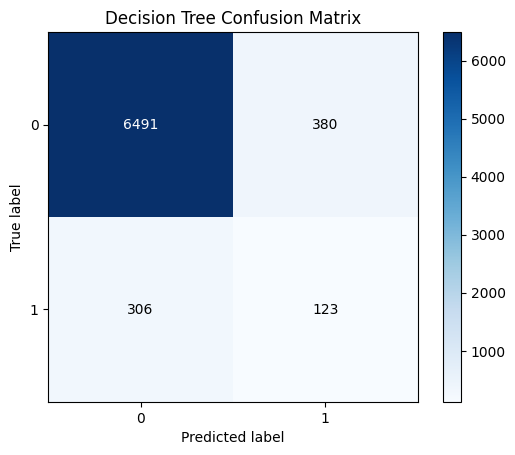

In [ ]:
# Confusion Matrix for Decision Tree
#plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
plot_confusion_matrix(y_test, dt_predictions, title="Decision Tree Confusion Matrix")

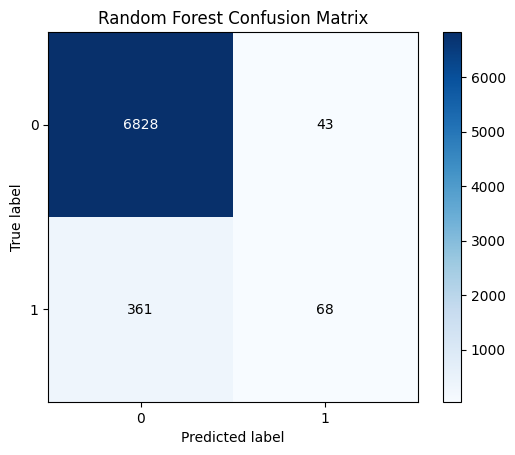

In [ ]:
# Confusion Matrix for Random Forest
#plt.subplot(1, 2, 2)
plot_confusion_matrix(y_test, rf_predictions, title="Random Forest Confusion Matrix")
plt.show()

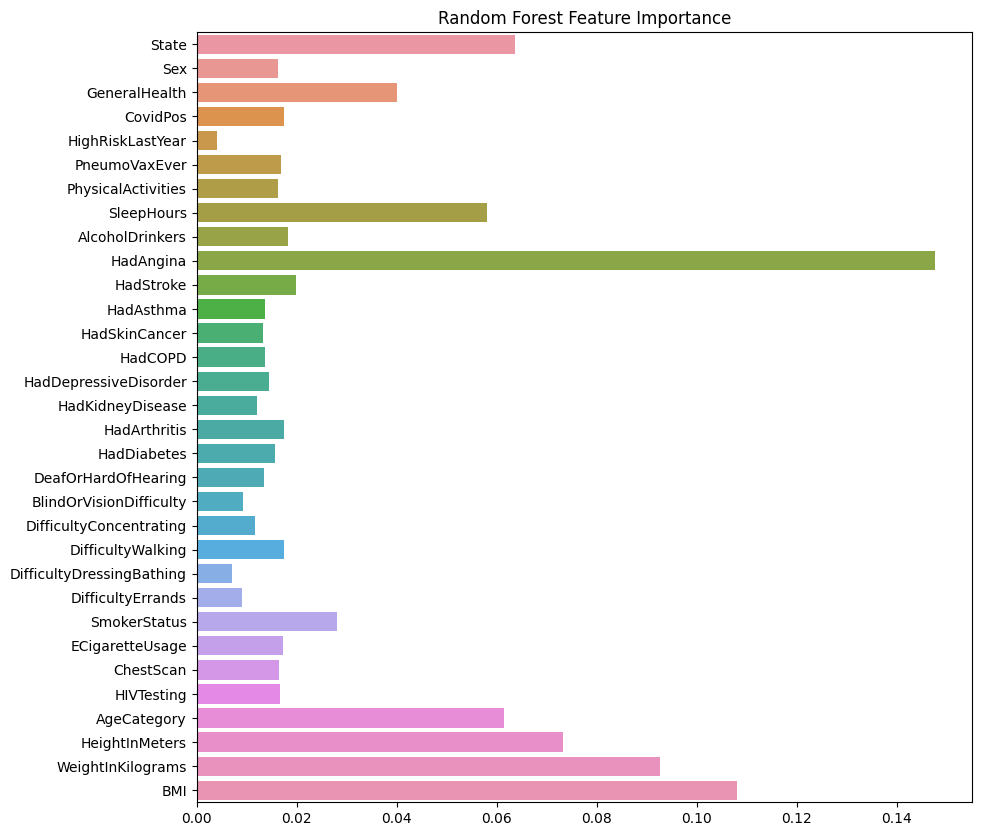

In [ ]:

feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

# Plot the feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Decision Tree ROC Curve')

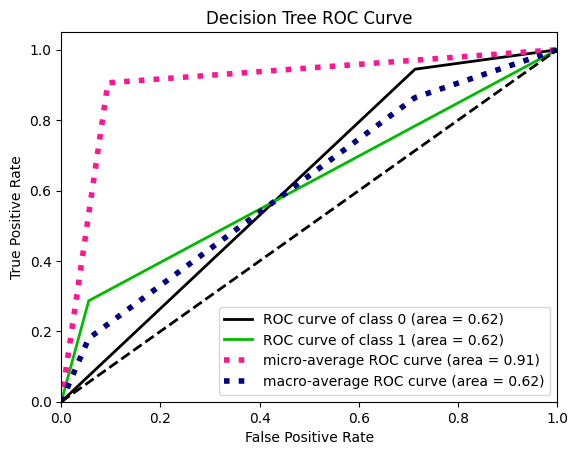

In [ ]:
# ROC Curve for Decision Tree
#plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
plot_roc_curve(y_test, dt_classifier.predict_proba(X_test))
plt.title("Decision Tree ROC Curve")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


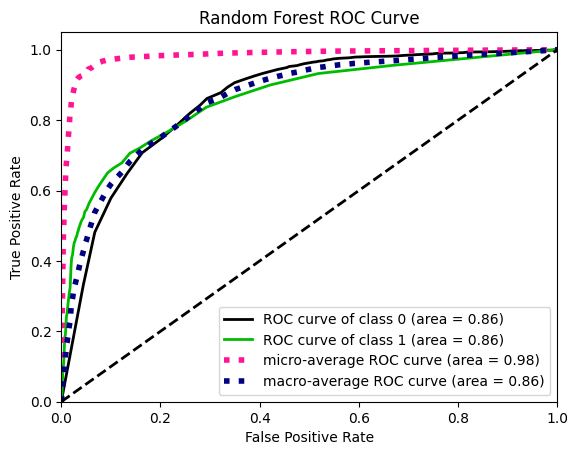

In [ ]:
# ROC Curve for Random Forest
#plt.subplot(1, 2, 2)
plot_roc_curve(y_test, rf_classifier.predict_proba(X_test))
plt.title("Random Forest ROC Curve")
plt.show()

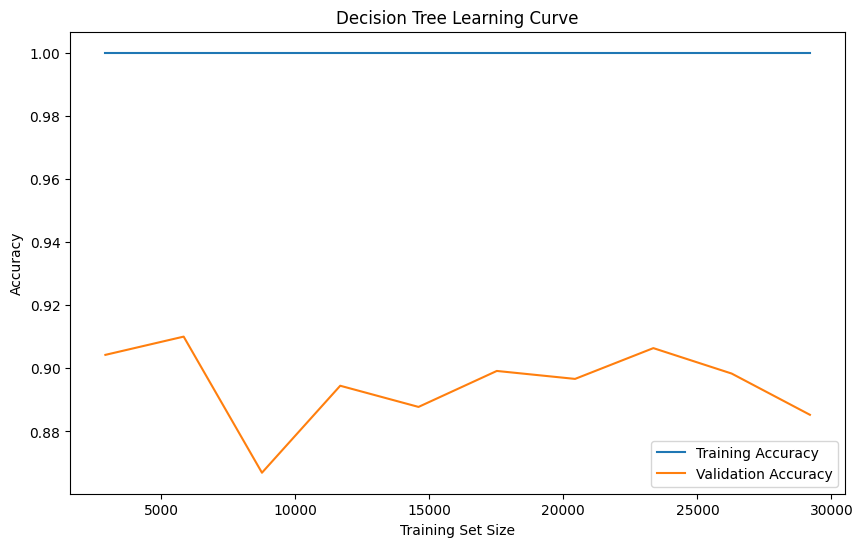

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

# Learning Curve for Decision Tree
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.show()


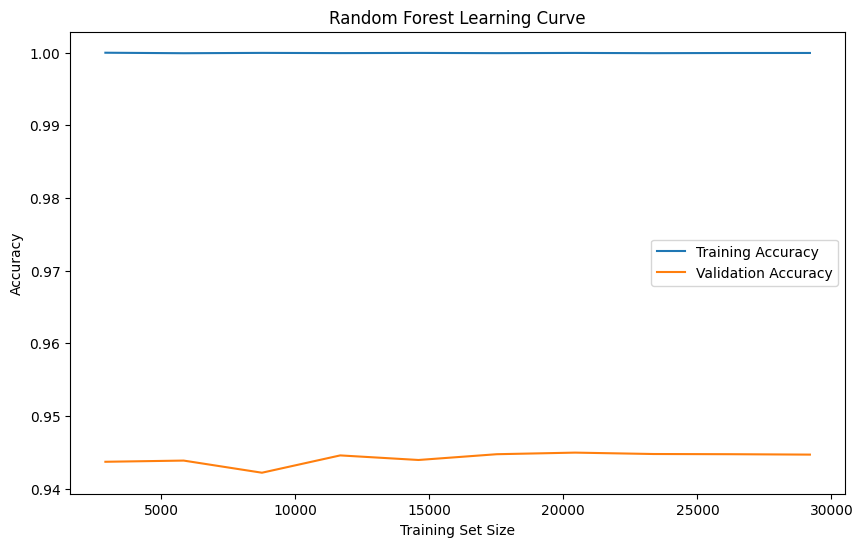

In [ ]:
# Learning Curve for Random Forest
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training Accuracy')
plt.plot(train_sizes_rf, np.mean(test_scores_rf, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.show()


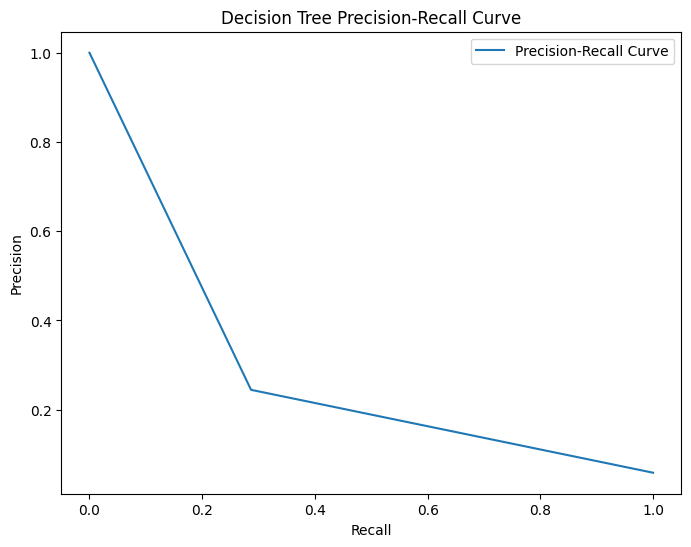

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve for Decision Tree
precision, recall, _ = precision_recall_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and predict with Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Train and predict with Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate and compare performance
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

dt_precision = precision_score(y_test, dt_predictions)
rf_precision = precision_score(y_test, rf_predictions)

dt_recall = recall_score(y_test, dt_predictions)
rf_recall = recall_score(y_test, rf_predictions)

dt_f1 = f1_score(y_test, dt_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Display comparison metrics
print("Decision Tree Metrics:")
print("Accuracy: {:.2f}".format(dt_accuracy))
print("Precision: {:.2f}".format(dt_precision))
print("Recall: {:.2f}".format(dt_recall))
print("F1 Score: {:.2f}".format(dt_f1))

print("\nRandom Forest Metrics:")
print("Accuracy: {:.2f}".format(rf_accuracy))
print("Precision: {:.2f}".format(rf_precision))
print("Recall: {:.2f}".format(rf_recall))
print("F1 Score: {:.2f}".format(rf_f1))


Decision Tree Metrics:
Accuracy: 0.90
Precision: 0.24
Recall: 0.28
F1 Score: 0.26

Random Forest Metrics:
Accuracy: 0.95
Precision: 0.63
Recall: 0.17
F1 Score: 0.26


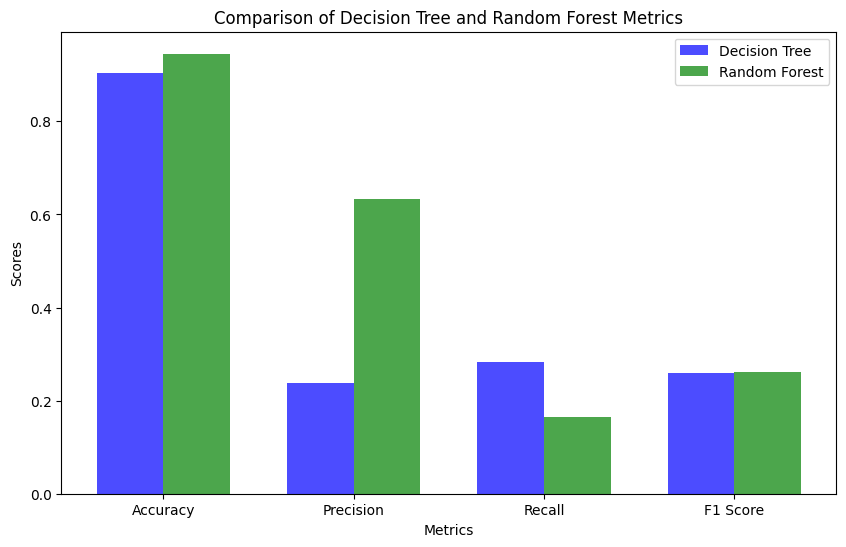

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Decision Tree
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]

# Metrics for Random Forest
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Bar width
bar_width = 0.35
index = np.arange(len(metric_names))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(index, dt_metrics, bar_width, label='Decision Tree', color='b', alpha=0.7)
plt.bar(index + bar_width, rf_metrics, bar_width, label='Random Forest', color='g', alpha=0.7)

# Labeling
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Decision Tree and Random Forest Metrics')
plt.xticks(index + bar_width / 2, metric_names)
plt.legend()

# Show the plot
plt.show()

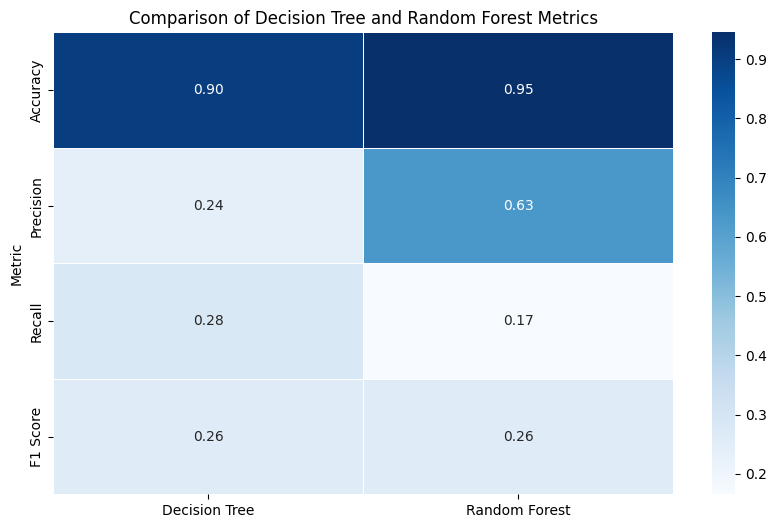

In [ ]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': metric_names,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
})

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.set_index('Metric'), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Comparison of Decision Tree and Random Forest Metrics')
plt.show()


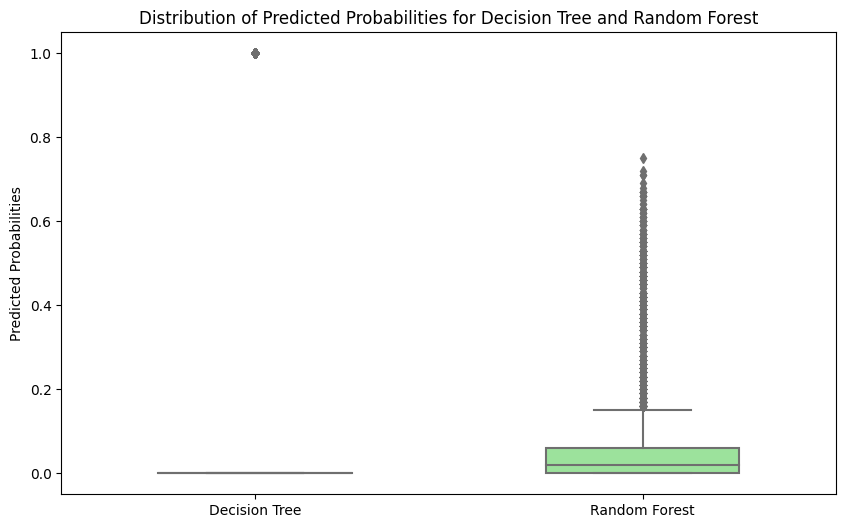

In [ ]:
# Boxplot of Predictions for Decision Tree and Random Forest
plt.figure(figsize=(10, 6))
sns.boxplot(data=[dt_classifier.predict_proba(X_test)[:, 1], rf_classifier.predict_proba(X_test)[:, 1]],
            width=0.5, palette=['skyblue', 'lightgreen'])
plt.xticks([0, 1], ['Decision Tree', 'Random Forest'])
plt.ylabel('Predicted Probabilities')
plt.title('Distribution of Predicted Probabilities for Decision Tree and Random Forest')
plt.show()


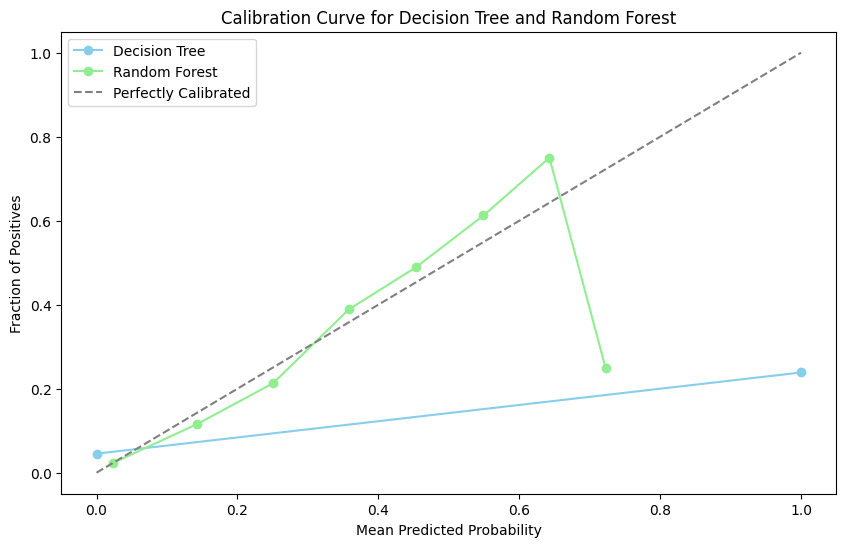

In [ ]:
from sklearn.calibration import calibration_curve

# Calibration Curve for Decision Tree
prob_true_dt, prob_pred_dt = calibration_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1], n_bins=10)
# Calibration Curve for Random Forest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1], n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(prob_pred_dt, prob_true_dt, marker='o', linestyle='-', label='Decision Tree', color='skyblue')
plt.plot(prob_pred_rf, prob_true_rf, marker='o', linestyle='-', label='Random Forest', color='lightgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Decision Tree and Random Forest')
plt.legend()
plt.show()


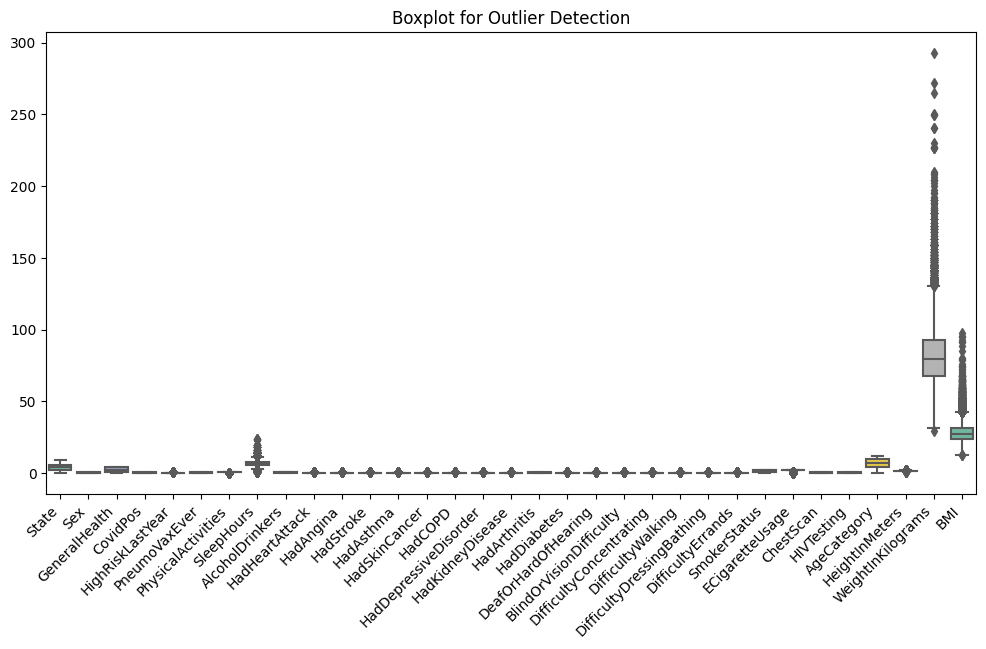

In [ ]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, palette='Set2')
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numeric columns
z_scores = np.abs(zscore(data.select_dtypes(include=['float64'])))

# Set a threshold for Z-score to identify outliers
threshold = 3
outliers = (z_scores > threshold).all(axis=1)

# Print the number of outliers
print("Number of outliers:", outliers.sum())


Number of outliers: 0


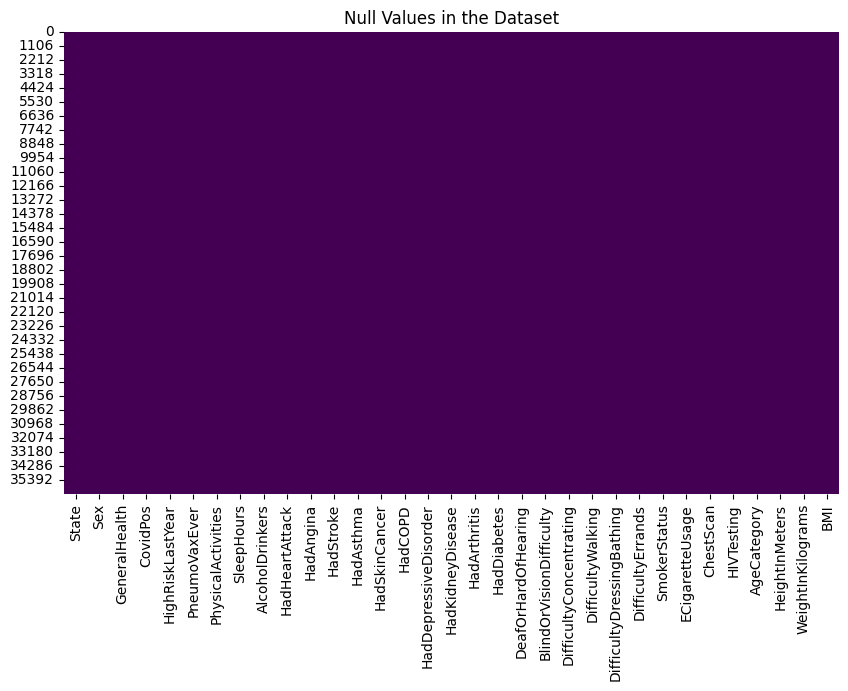

In [ ]:
# Visualize Null Values using a Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in the Dataset')
plt.show()


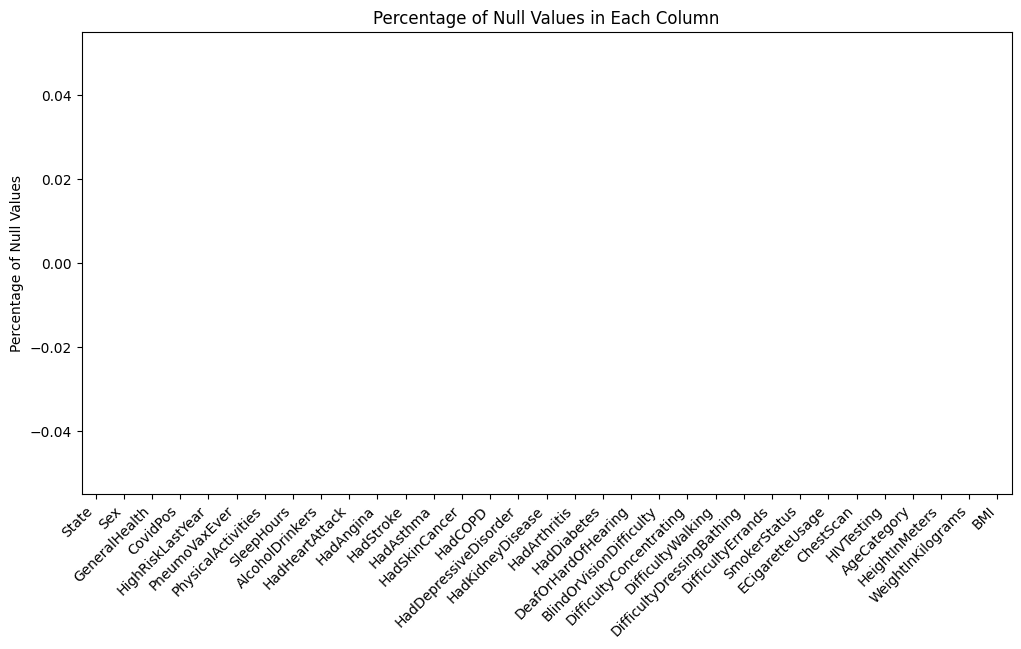

In [ ]:
# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Create a bar plot for null values percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentage.index, y=null_percentage, palette='viridis')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Null Values')
plt.show()


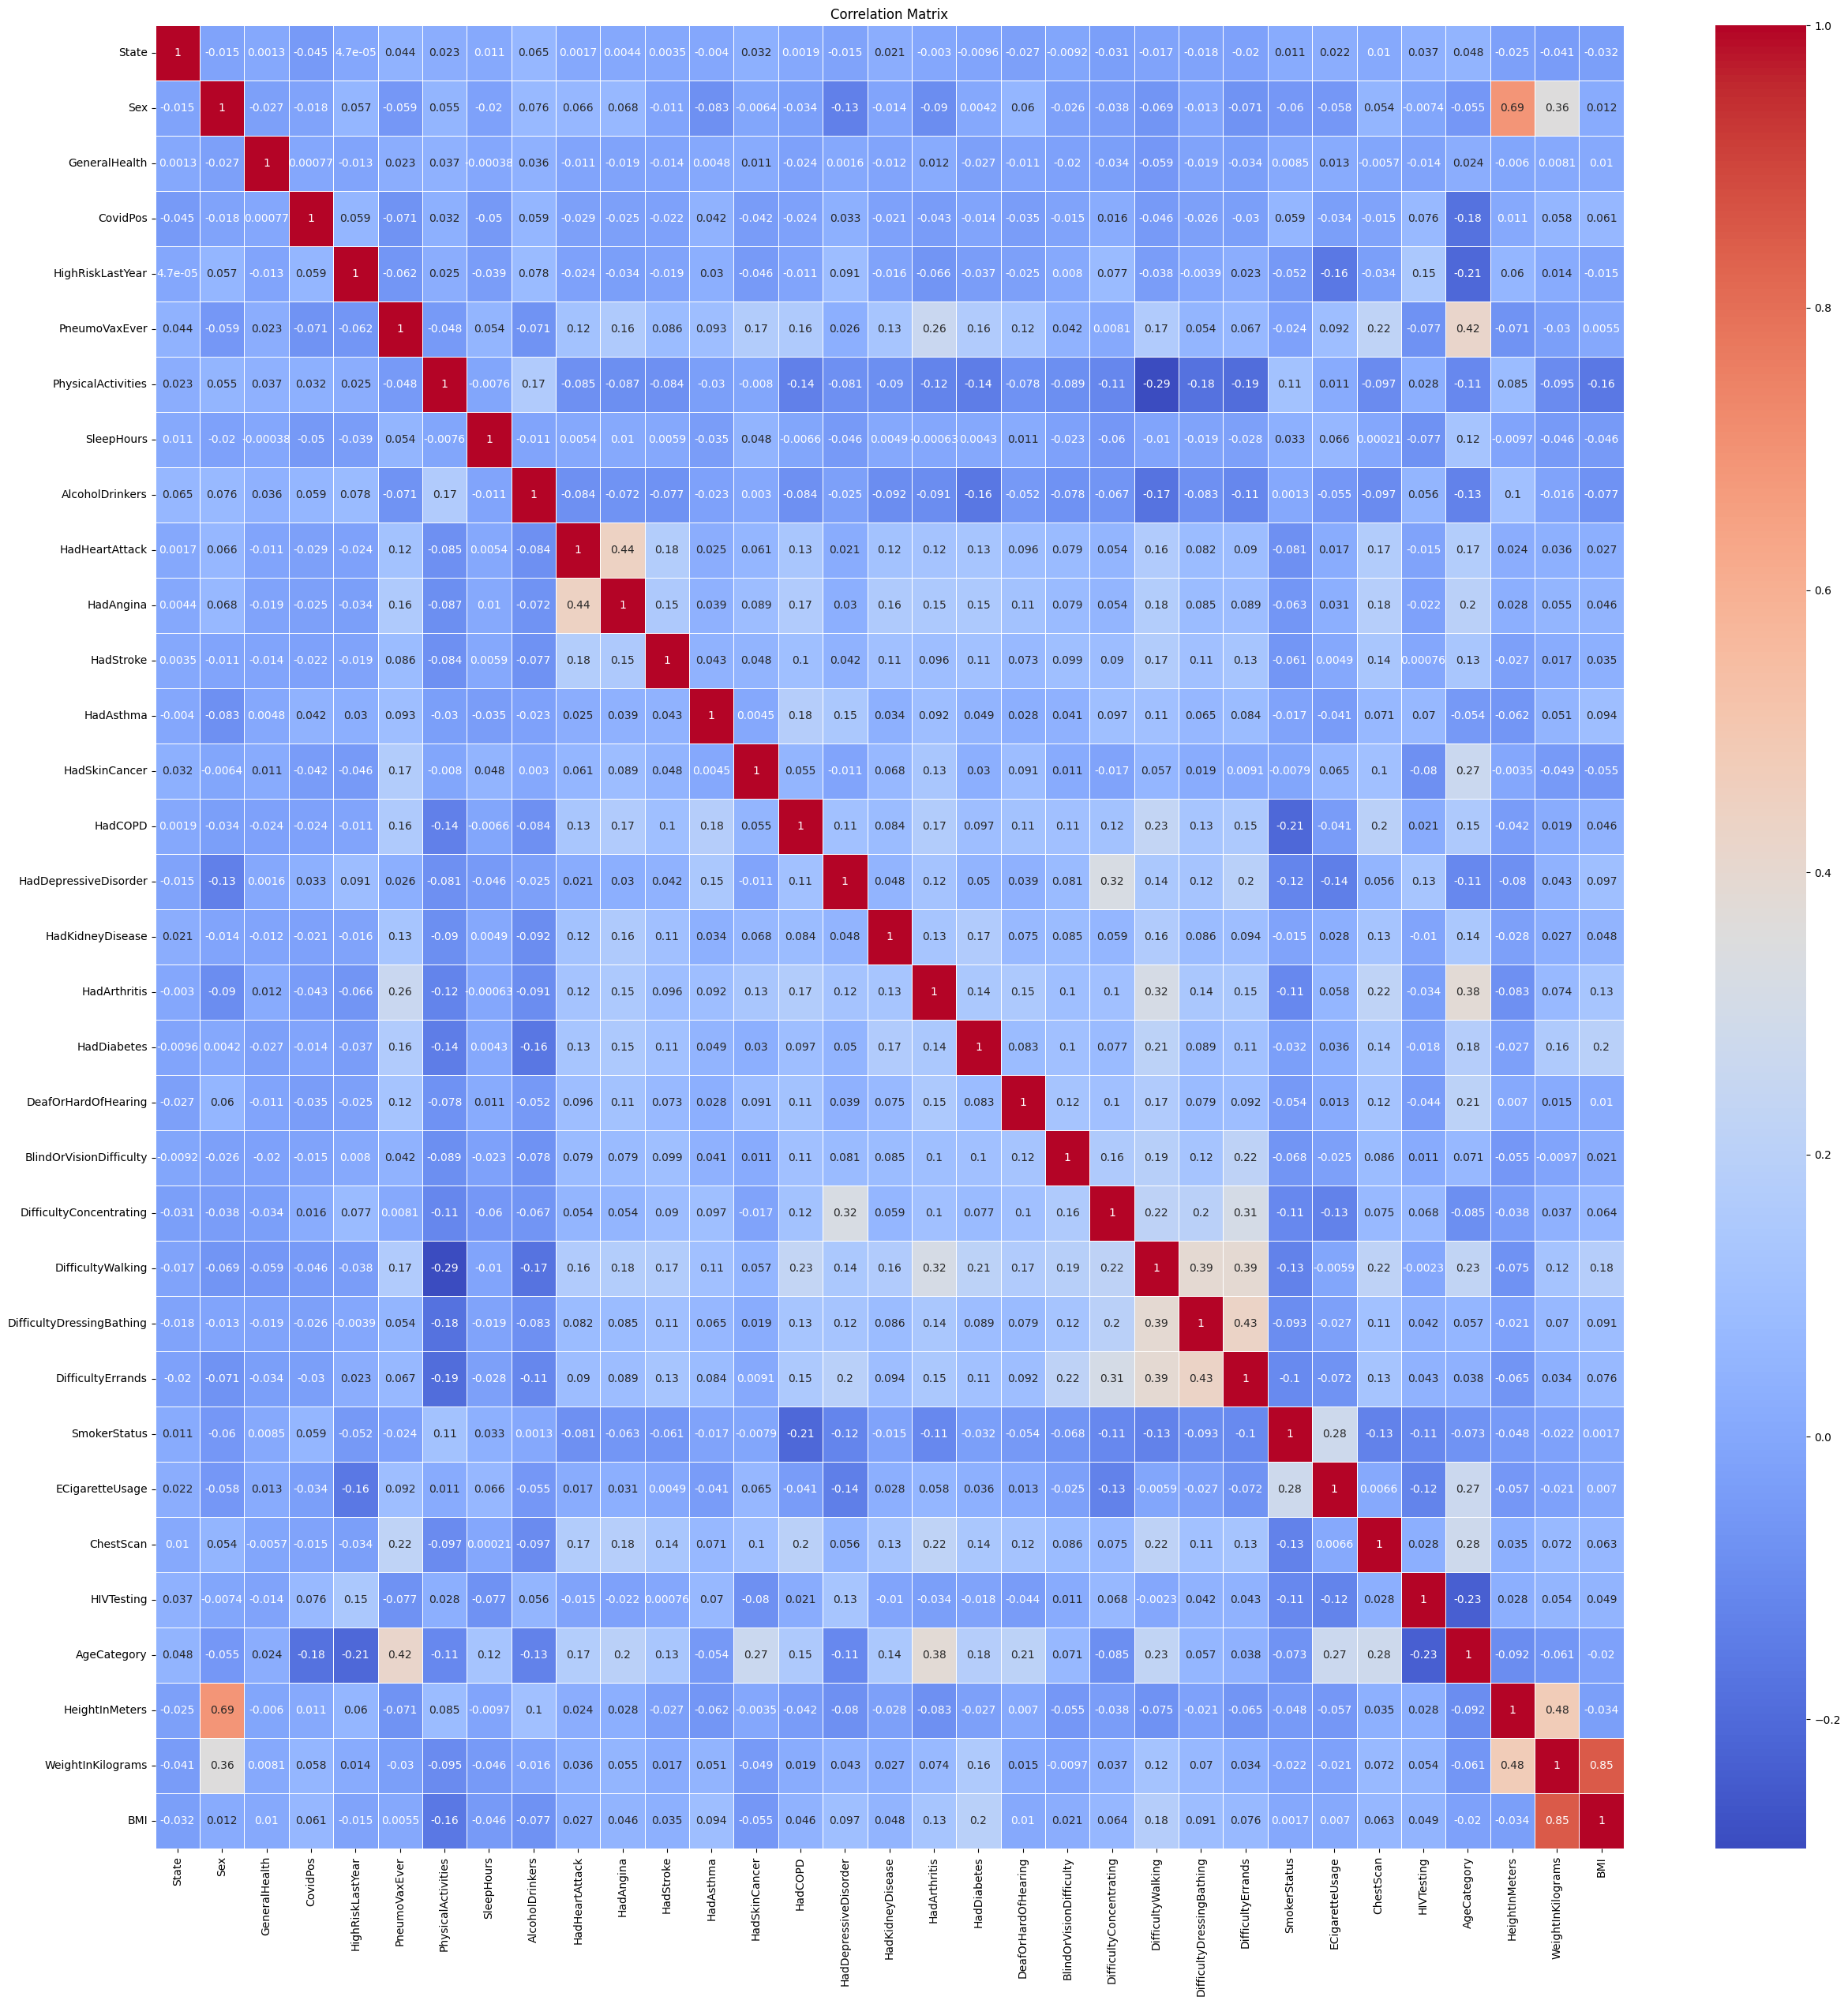

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


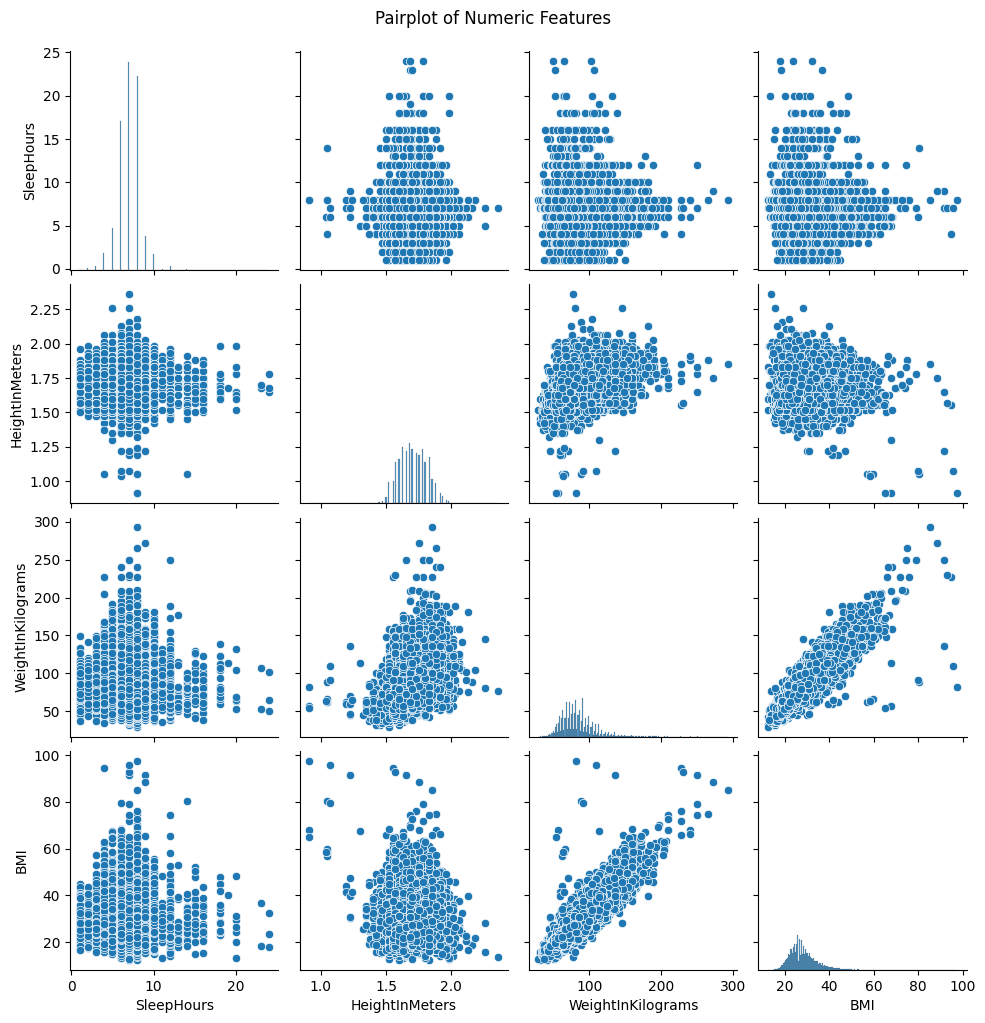

In [ ]:
# Create a pairplot for numeric features
sns.pairplot(data.select_dtypes(include=['float64']))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


In [ ]:
# Create count plots for categorical variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, len(categorical_cols)//2, i)
    sns.countplot(data[col], palette='Set3')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

# Custom Prediction:

In [ ]:
import pandas as pd

# Define the data
data = {
    'State': [0],
    'Sex': [1],
    'GeneralHealth': [2],
    'CovidPos': [0],
    'HighRiskLastYear': [0],
    'PneumoVaxEver': [0],
    'PhysicalActivities': [0],
    'SleepHours': [7],
    'AlcoholDrinkers': [0],
    'HadHeartAttack': [0],
    'HadAngina': [0],
    'HadStroke': [0],
    'HadAsthma': [0],
    'HadSkinCancer': [0],
    'HadCOPD': [0],
    'HadDepressiveDisorder': [0],
    'HadKidneyDisease': [0],
    'HadArthritis': [0],
    'HadDiabetes': [0],
    'DeafOrHardOfHearing': [0],
    'BlindOrVisionDifficulty': [0],
    'DifficultyConcentrating': [0],
    'DifficultyWalking': [0],
    'DifficultyDressingBathing': [0],
    'DifficultyErrands': [0],
    'SmokerStatus': [0],
    'ECigaretteUsage': [0],
    'ChestScan': [0],
    'HIVTesting': [0],
    'AgeCategory': [0],
    'HeightInMeters': [1.78],
    'WeightInKilograms': [71.67],
    'BMI': [27.99]
}

# Create a DataFrame named "custom_data"
custom_data = pd.DataFrame(data)


In [ ]:
# Display column names
print("Column Names:")
print(custom_data)

Column Names:
   State  Sex  GeneralHealth  CovidPos  HighRiskLastYear  PneumoVaxEver  \
0      0    1              2         0                 0              0   

   PhysicalActivities  SleepHours  AlcoholDrinkers  HadHeartAttack  ...  \
0                   0           7                0               0  ...   

   DifficultyDressingBathing  DifficultyErrands  SmokerStatus  \
0                          0                  0             0   

   ECigaretteUsage  ChestScan  HIVTesting  AgeCategory  HeightInMeters  \
0                0          0           0            0            1.78   

   WeightInKilograms    BMI  
0              71.67  27.99  

[1 rows x 33 columns]


In [ ]:
# Check for feature mismatches
model_features = dt_classifier.feature_names_in_
dataset_features = custom_data.columns

mismatched_features = set(dataset_features) - set(model_features)

if mismatched_features:
    print("Mismatched Features:", mismatched_features)
    # Handle the mismatch by removing or modifying features in the dataset
else:
    # Features match, proceed with predictions
    predictions = dt_classifier.predict(custom_data)
    print("Predictions:", predictions)


Mismatched Features: {'HadHeartAttack'}


In [ ]:
# Assuming 'HadHeartAttack' is a target variable
custom_data = custom_data.drop('HadHeartAttack', axis=1)


In [ ]:
# Display unique values and data types for each column
for column in custom_data.columns:
    unique_values = custom_data[column].unique()
    data_type = custom_data[column].dtype
    print(f"Column: {column}, Unique Values: {unique_values}, Data Type: {data_type}")


Column: State, Unique Values: [0], Data Type: int64
Column: Sex, Unique Values: [1], Data Type: int64
Column: GeneralHealth, Unique Values: [2], Data Type: int64
Column: CovidPos, Unique Values: [0], Data Type: int64
Column: HighRiskLastYear, Unique Values: [0], Data Type: int64
Column: PneumoVaxEver, Unique Values: [0], Data Type: int64
Column: PhysicalActivities, Unique Values: [0], Data Type: int64
Column: SleepHours, Unique Values: [7], Data Type: int64
Column: AlcoholDrinkers, Unique Values: [0], Data Type: int64
Column: HadAngina, Unique Values: [0], Data Type: int64
Column: HadStroke, Unique Values: [0], Data Type: int64
Column: HadAsthma, Unique Values: [0], Data Type: int64
Column: HadSkinCancer, Unique Values: [0], Data Type: int64
Column: HadCOPD, Unique Values: [0], Data Type: int64
Column: HadDepressiveDisorder, Unique Values: [0], Data Type: int64
Column: HadKidneyDisease, Unique Values: [0], Data Type: int64
Column: HadArthritis, Unique Values: [0], Data Type: int64
Colu

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder for each categorical column
label_encoders = {}

for column in custom_data.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    [column] = le.fit_transform(custom_data[column])
    label_encoders[column] = le

# Display the mapping of original values to encoded values
for column, le in label_encoders.items():
    print(f"Column: {column}, Encoded Values: {dict(zip(le.classes_, le.transform(le.classes_)))}")


In [ ]:
predictions = dt_classifier.predict(custom_data)
print("Predictions:", predictions)


Predictions: [0]


# Prediction with specefic columns:

In [ ]:
# Selecting specific columns for the analysis
columns = ['Sex', 'GeneralHealth', 'PhysicalActivities', 'HadStroke', 'HadSkinCancer',
           'SmokerStatus', 'CovidPos', 'BMI', 'AlcoholDrinkers','HadHeartAttack']
data = data[columns]

# Handling missing values
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Defining the target variable and features
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Building and training the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Making predictions with both models
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluating the models
dt_accuracy = accuracy_score(y_test, dt_predictions) * 100
rf_accuracy = accuracy_score(y_test, rf_predictions) * 100

# Printing the accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")


Decision Tree Accuracy: 91.70%
Random Forest Accuracy: 92.17%


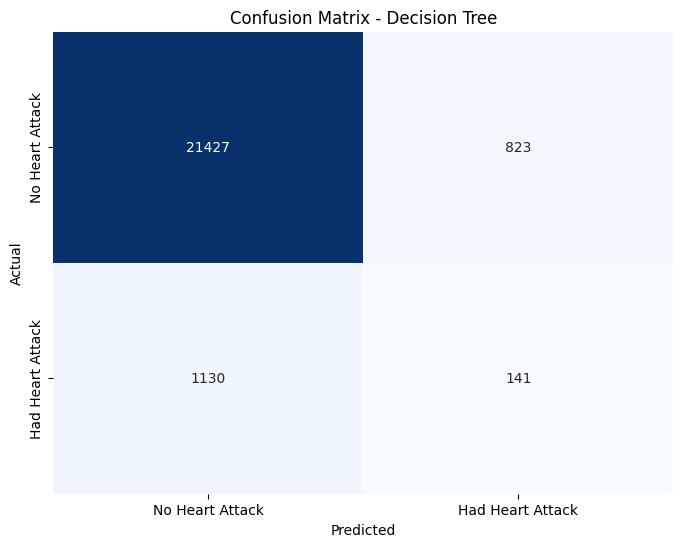

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Attack', 'Had Heart Attack'],
            yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics for Decision Tree
precision_dt = precision_score(y_test, dt_predictions)
recall_dt = recall_score(y_test, dt_predictions)
f1_dt = f1_score(y_test, dt_predictions)

# Calculate metrics for Random Forest
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)

# Print the results
print("Decision Tree Metrics:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("\nRandom Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Decision Tree Metrics:
Precision: 0.1462655601659751
Recall: 0.1109362706530291
F1 Score: 0.12617449664429528

Random Forest Metrics:
Precision: 0.15158924205378974
Recall: 0.0975609756097561
F1 Score: 0.11871708951651509


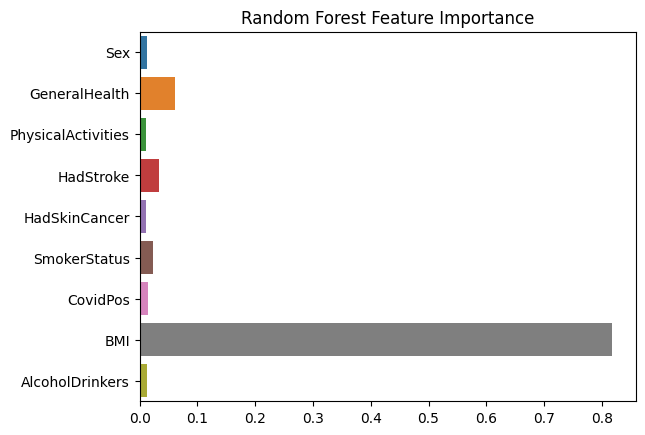

In [ ]:
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.show()


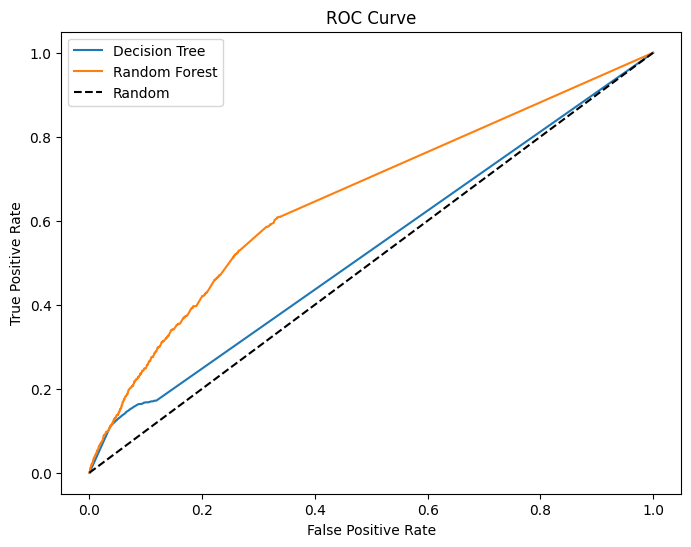

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class
dt_probs = dt_classifier.predict_proba(X_test)[:, 1]
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


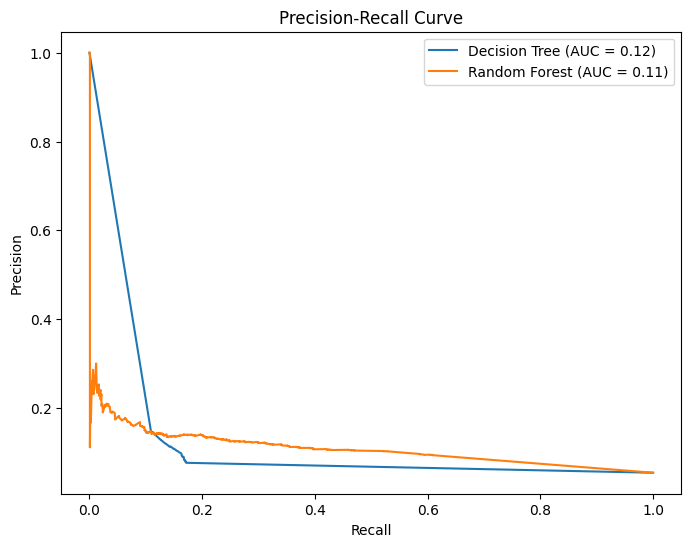

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_probs)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)

# Compute area under the curve (AUC) for precision-recall curve
auc_dt = auc(recall_dt, precision_dt)
auc_rf = auc(recall_rf, precision_rf)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


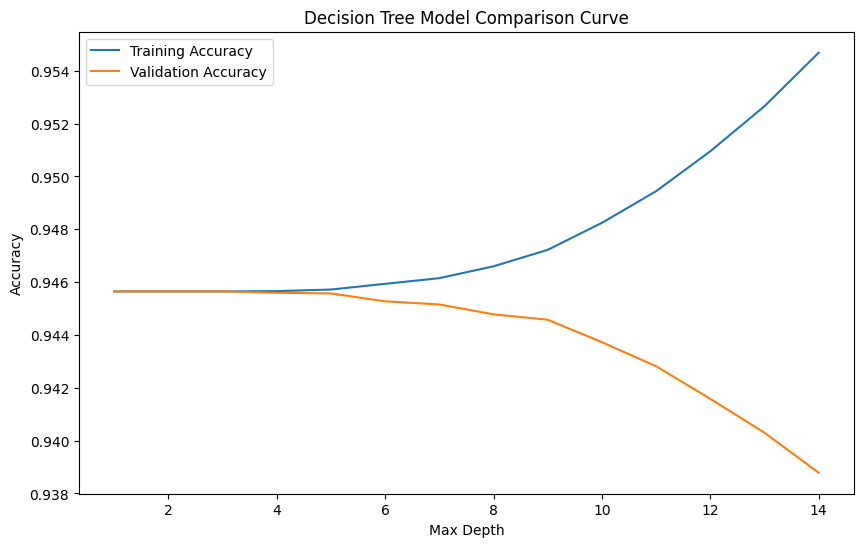

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np

# Varying hyperparameter (e.g., max depth) for Decision Tree
param_range = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Comparison Curve')
plt.legend()
plt.show()


# Model Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for Decision Tree and Random Forest
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform grid search for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Perform grid search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Print the best parameters for Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Print the best parameters for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Use the best models for predictions
best_dt_model = grid_search_dt.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# Make predictions
dt_predictions_tuned = best_dt_model.predict(X_test)
rf_predictions_tuned = best_rf_model.predict(X_test)

In [ ]:
# Evaluate the tuned models
dt_accuracy_tuned = accuracy_score(y_test, dt_predictions_tuned) * 100
rf_accuracy_tuned = accuracy_score(y_test, rf_predictions_tuned) * 100

In [ ]:
# Print the accuracies of tuned models
print("Tuned Decision Tree Accuracy: {:.2f}%".format(dt_accuracy_tuned))
print("Tuned Random Forest Accuracy: {:.2f}%".format(rf_accuracy_tuned))

Tuned Decision Tree Accuracy: 94.58%
Tuned Random Forest Accuracy: 94.57%


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree:", dt_cv_scores)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", rf_cv_scores)


Cross-Validation Scores for Decision Tree: [0.91718039 0.91820076 0.91807321 0.91853741 0.92223639]
Cross-Validation Scores for Random Forest: [0.92041155 0.9222397  0.9213894  0.92215136 0.92644558]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


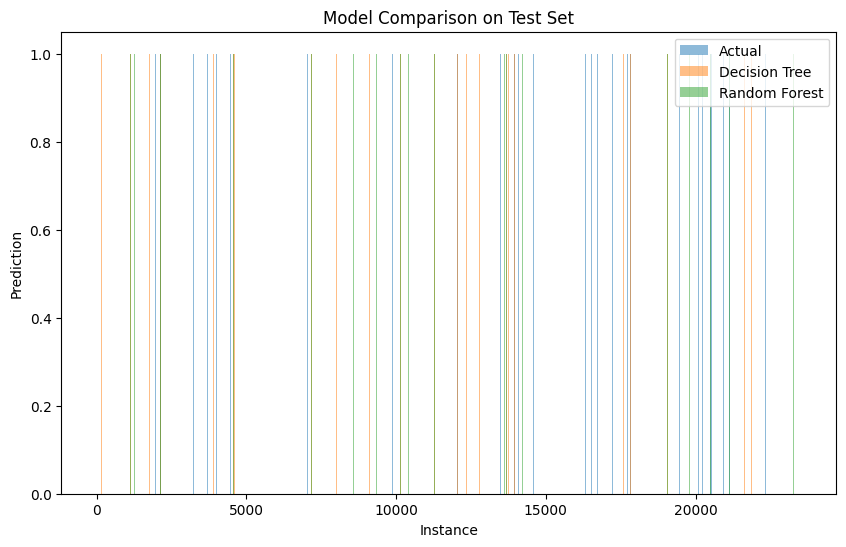

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(y_test)), y_test, label='Actual', alpha=0.5)
plt.bar(np.arange(len(dt_predictions)) + 0.2, dt_predictions, label='Decision Tree', alpha=0.5)
plt.bar(np.arange(len(rf_predictions)) + 0.4, rf_predictions, label='Random Forest', alpha=0.5)
plt.xlabel('Instance')
plt.ylabel('Prediction')
plt.title('Model Comparison on Test Set')
plt.legend()
plt.show()


# END